In [1]:
%cd ../..

/home/work/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from examples.fep_control import fep_control
from combinators.model import active
from combinators.model import compose, foldable
from combinators.inference import importance
from combinators import utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
target = fep_control.MountainCarAgent(observation_dim=2, state_dim=2, batch_shape=(10,), trainable=False)
proposal = fep_control.RecognitionAgent(state_dim=2, action_dim=1, observation_dim=2, batch_shape=(10,),
                                        discrete_actions=False, name='MountainCarAgent', trainable=True,
                                        goal=target.goal)
agent = importance.propose(target, proposal)

In [5]:
episode = active.ActiveEpisode(agent, 'MountainCarContinuous-v0')

In [6]:
theta, graph, log_weight = episode(render=True)

In [7]:
xi, trained_params, elbos = active.active_variational(episode, 10, lr=1e-2, log_estimator=True, patience=None)

07/11/2019 13:49:42 Episode length: 1000
07/11/2019 13:49:44 ELBO=-2.17968170e+02 per step at epoch 1
07/11/2019 13:49:47 Episode length: 404
07/11/2019 13:49:49 ELBO=-2.13514984e+02 per step at epoch 2
07/11/2019 13:49:51 Episode length: 332
07/11/2019 13:49:53 ELBO=-1.90134232e+02 per step at epoch 3
07/11/2019 13:49:55 Episode length: 319
07/11/2019 13:49:56 ELBO=-1.88786301e+02 per step at epoch 4
07/11/2019 13:50:03 Episode length: 1000
07/11/2019 13:50:06 ELBO=-1.83310486e+02 per step at epoch 5
07/11/2019 13:50:12 Episode length: 1000
07/11/2019 13:50:16 ELBO=-1.68770538e+02 per step at epoch 6
07/11/2019 13:50:22 Episode length: 1000
07/11/2019 13:50:26 ELBO=-1.67256500e+02 per step at epoch 7
07/11/2019 13:50:31 Episode length: 778
07/11/2019 13:50:34 ELBO=-1.59012177e+02 per step at epoch 8
07/11/2019 13:50:37 Episode length: 516
07/11/2019 13:50:39 ELBO=-1.54756210e+02 per step at epoch 9
07/11/2019 13:50:44 Episode length: 819
07/11/2019 13:50:47 ELBO=-1.47274246e+02 per st

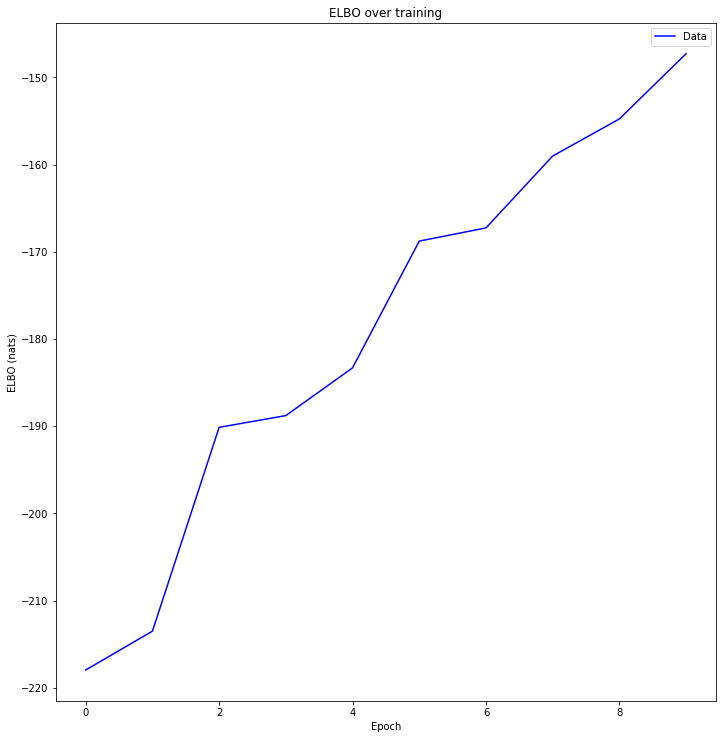

In [8]:
utils.plot_evidence_bounds(elbos[:, 0].cpu().detach().numpy())

In [9]:
theta, graph, log_weight = episode(render=True)

In [10]:
theta

{'dynamics': tensor([[0.4213, 0.0570],
         [0.4223, 0.0639],
         [0.3986, 0.0607],
         [0.4120, 0.0599],
         [0.3913, 0.0596],
         [0.4527, 0.0542],
         [0.4097, 0.0601],
         [0.4090, 0.0625],
         [0.3999, 0.0608],
         [0.4118, 0.0638]], grad_fn=<AddmmBackward>), 'control': tensor([[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]], grad_fn=<HardtanhBackward0>), 't': 628}

In [11]:
log_weight

tensor([ -91748.0469, -100284.3984,  -95216.3125,  -93318.7266,  -91142.9375,
         -89414.2656,  -93858.3438,  -90241.8281,  -90313.5781,  -89801.6172],
       grad_fn=<AddBackward0>)

In [12]:
torch.save(agent, 'examples/fep_control/fep_mountain_car_agent.dat')